In [1]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
# Importamos utilidades y modelos de sklearn
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


# Se levanta el set de train generado

In [2]:
data_set = pd.read_csv("train_set_xgb.csv")
#X = data_set.loc[:, (data_set.columns != 'precio') & (data_set.columns != 'factor_pm')]
X = data_set.loc[:, (data_set.columns != 'precio')]
y = data_set.loc[:, ['precio']]

In [3]:
data_set.columns

Index(['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos',
       'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio', 'usosmultiples',
       'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'precio',
       'tipodepropiedad_1', 'tipodepropiedad_2', 'tipodepropiedad_3',
       'tipodepropiedad_4', 'tipodepropiedad_5', 'tipodepropiedad_6',
       'tipodepropiedad_7', 'tipodepropiedad_8', 'tipodepropiedad_9',
       'tipodepropiedad_10', 'tipodepropiedad_11', 'tipodepropiedad_12',
       'tipodepropiedad_13', 'tipodepropiedad_14', 'tipodepropiedad_15',
       'tipodepropiedad_16', 'tipodepropiedad_17', 'tipodepropiedad_18',
       'tipodepropiedad_19', 'tipodepropiedad_20', 'tipodepropiedad_21',
       'tipodepropiedad_22', 'tipodepropiedad_23', 'tipodepropiedad_24',
       'tipodepropiedad_25', 'provincia_1', 'provincia_2', 'provincia_3',
       'provincia_4', 'provincia_5', 'provincia_6', 'provincia_7',
       'provincia_8', 'provincia_9', 'provincia_10', 

In [4]:
X.columns

Index(['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos',
       'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio', 'usosmultiples',
       'piscina', 'escuelascercanas', 'centroscomercialescercanos',
       'tipodepropiedad_1', 'tipodepropiedad_2', 'tipodepropiedad_3',
       'tipodepropiedad_4', 'tipodepropiedad_5', 'tipodepropiedad_6',
       'tipodepropiedad_7', 'tipodepropiedad_8', 'tipodepropiedad_9',
       'tipodepropiedad_10', 'tipodepropiedad_11', 'tipodepropiedad_12',
       'tipodepropiedad_13', 'tipodepropiedad_14', 'tipodepropiedad_15',
       'tipodepropiedad_16', 'tipodepropiedad_17', 'tipodepropiedad_18',
       'tipodepropiedad_19', 'tipodepropiedad_20', 'tipodepropiedad_21',
       'tipodepropiedad_22', 'tipodepropiedad_23', 'tipodepropiedad_24',
       'tipodepropiedad_25', 'provincia_1', 'provincia_2', 'provincia_3',
       'provincia_4', 'provincia_5', 'provincia_6', 'provincia_7',
       'provincia_8', 'provincia_9', 'provincia_10', 'provincia

In [5]:
y.columns

Index(['precio'], dtype='object')

# Se separa en train y en test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

In [7]:
len(X_train)

144000

In [8]:
len(X_test)

96000

# Se define el modelo

In [9]:
xg_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=10, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='reg:squarederror', reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1.0, verbosity=1, random_state = 0)

# Se entrena

In [10]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=10, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1.0, verbosity=1)

# Se calcula la prediccion del set de test y del set de entrenamiento tambien

In [11]:
pred_train = xg_reg.predict(X_train)

In [12]:
pred_test = xg_reg.predict(X_test)

# Se evaluan ambas predicciones

In [13]:
mae_train = np.sqrt(sklearn.metrics.mean_absolute_error(y_train, pred_train))
mae_test = np.sqrt(sklearn.metrics.mean_absolute_error(y_test, pred_test))
#print(f"MAE train: {mea_train:.5f}")
#print(f"MAE test: {mea_test:.5f}")
print("MAE train: "+str(mae_train))
print("MAE test: "+str(mae_test))

MAE train: 775.1906085523477
MAE test: 785.9036794570858


# Feature importance

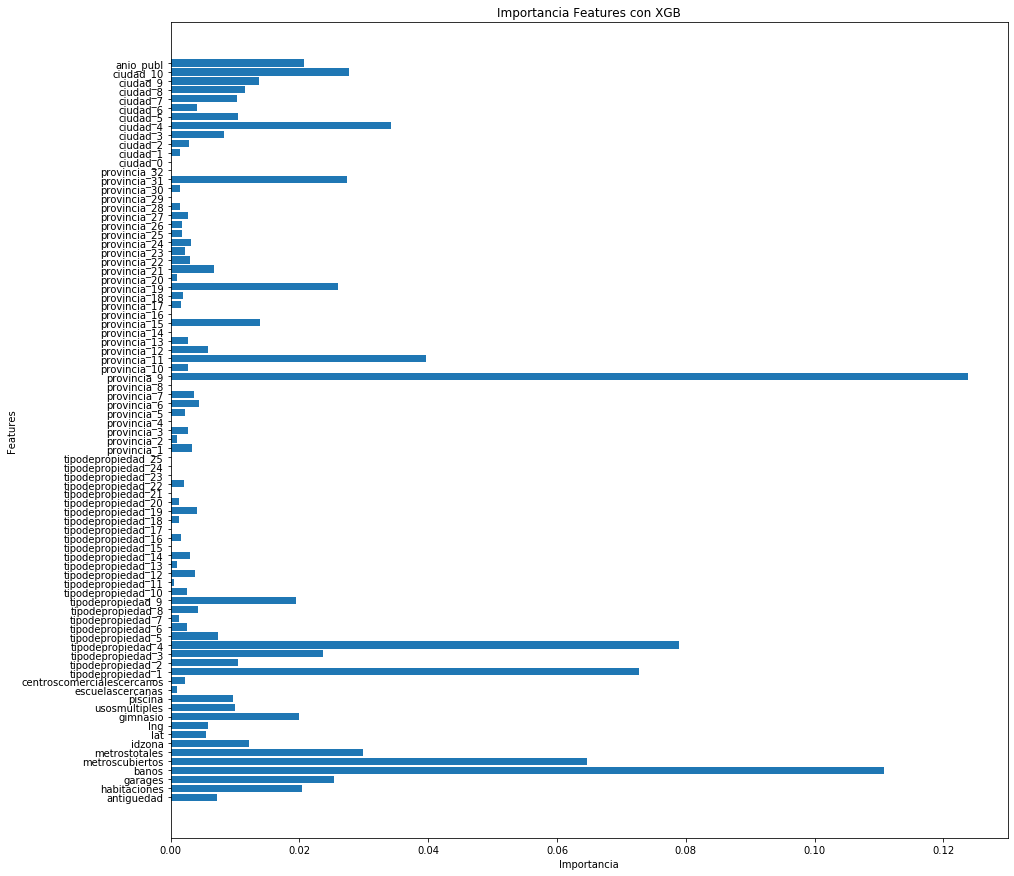

In [14]:
plt.figure(figsize = (15,15))
plt.barh(X_train.columns, xg_reg.feature_importances_)
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Importancia Features con XGB')
plt.show()

# Se genera el archivo con las predicciones a subir a Kaggle

In [15]:
test_set = pd.read_csv("test_set_xgb.csv")

In [16]:
test_set.columns

Index(['id', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio',
       'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'tipodepropiedad_1', 'tipodepropiedad_2',
       'tipodepropiedad_3', 'tipodepropiedad_4', 'tipodepropiedad_5',
       'tipodepropiedad_6', 'tipodepropiedad_7', 'tipodepropiedad_8',
       'tipodepropiedad_9', 'tipodepropiedad_10', 'tipodepropiedad_11',
       'tipodepropiedad_12', 'tipodepropiedad_13', 'tipodepropiedad_14',
       'tipodepropiedad_15', 'tipodepropiedad_16', 'tipodepropiedad_17',
       'tipodepropiedad_18', 'tipodepropiedad_19', 'tipodepropiedad_20',
       'tipodepropiedad_21', 'tipodepropiedad_22', 'tipodepropiedad_23',
       'tipodepropiedad_24', 'tipodepropiedad_25', 'provincia_1',
       'provincia_2', 'provincia_3', 'provincia_4', 'provincia_5',
       'provincia_6', 'provincia_7', 'provincia_8', 'provincia_9',
       'provincia_10

Predigo sin el 'id' porque no es parte de los features

In [17]:
pred_a_kaggle = xg_reg.predict(test_set.loc[:, test_set.columns != 'id'])

In [18]:
pred_a_kaggle

array([6895441.5 ,  841620.06, 2284703.5 , ..., 1028239.1 , 1396832.4 ,
       2576338.  ], dtype=float32)

In [19]:
df_a_kaggle = pd.DataFrame()
df_a_kaggle['id'] = test_set['id']
df_a_kaggle['target'] = pred_a_kaggle
df_a_kaggle.head()

,id,target
0,4941,6.895442e+06
1,51775,8.416201e+05
2,115253,2.284704e+06
3,299321,1.382959e+06
4,173570,5.273302e+05


In [20]:
len(df_a_kaggle)

60000

In [21]:
df_a_kaggle.to_csv("subir_a_kaggle_xgb_individual", header = True, index = False)